In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [3]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [4]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
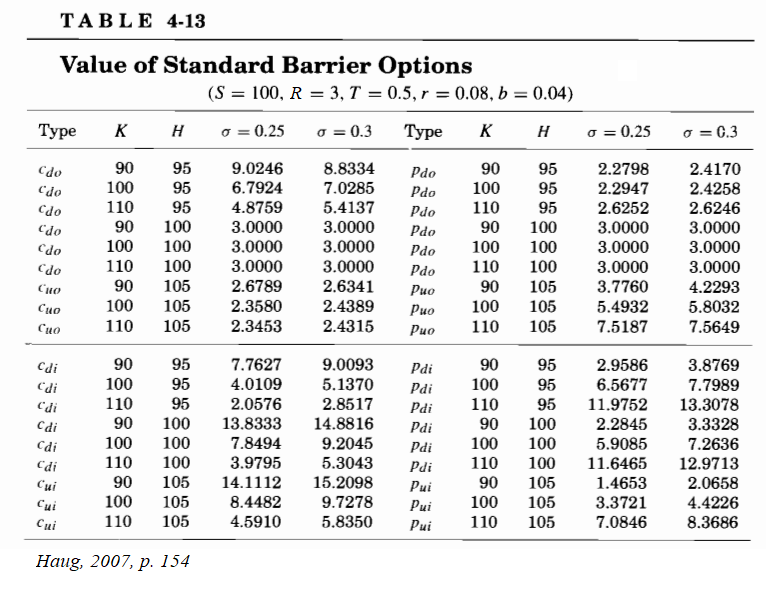

In [98]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [6]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

In [10]:
Ks = [90, 100, 110]
Hs = [95, 100, 105]
sigmas = [.25, .3]
option_types = ["Up-and-out", "Down-and-out", "Up-and-in", "Down-and-in"]
alliases = {'Up-and-out': 'uo', 'Down-and-out': 'do', 'Up-and-in': 'ui', 'Down-and-in': 'di'}

output = {'type': [], 'K': [], 'H': [], 'sigma': [], 'price': []}

for _option in ['call', 'put']:
    for ks in Ks:
        for hs in Hs:
            for sigma in sigmas:
                for option_t in option_types:
                    if _option == 'call':
                        price = barrier_option(option_t, S, hs, ks, R, T, r, b, sigma, True)
                    else:
                        price = barrier_option(option_t, S, hs, ks, R, T, r, b, sigma, False)

                    output['type'].append(f'{_option[0]}_{alliases[option_t]}')
                    output['K'].append(ks)
                    output['H'].append(hs)
                    output['sigma'].append(sigma)
                    output['price'].append(price)

df = pd.DataFrame(output)


In [15]:
df[(df.sigma == .25) & ((df.type == 'c_uo') | (df.type == 'c_do'))]

,type,K,H,sigma,price
0,c_uo,90,95,0.25,3.681457
1,c_do,90,95,0.25,9.024568
8,c_uo,90,100,0.25,3.000000
9,c_do,90,100,0.25,3.000000
16,c_uo,90,105,0.25,2.678913
17,c_do,90,105,0.25,-5.532712
24,c_uo,100,95,0.25,3.697457
25,c_do,100,95,0.25,6.792437
32,c_uo,100,100,0.25,3.000000
33,c_do,100,100,0.25,3.000000


In [16]:
df[(df.sigma == .25) & ((df.type == 'p_uo') | (df.type == 'p_do'))]

,type,K,H,sigma,price
72,p_uo,90,95,0.25,0.840847
73,p_do,90,95,0.25,2.279838
80,p_uo,90,100,0.25,3.000000
81,p_do,90,100,0.25,3.000000
88,p_uo,90,105,0.25,3.775955
89,p_do,90,105,0.25,3.714333
96,p_uo,100,95,0.25,-1.253193
97,p_do,100,95,0.25,2.294750
104,p_uo,100,100,0.25,3.000000
105,p_do,100,100,0.25,3.000000


In [17]:
df[(df.sigma == .25) & ((df.type == 'p_ui') | (df.type == 'p_di'))]


,type,K,H,sigma,price
74,p_ui,90,95,0.25,4.508067
75,p_di,90,95,0.25,2.958582
82,p_ui,90,100,0.25,2.284469
83,p_di,90,100,0.25,2.284469
90,p_ui,90,105,0.25,1.465313
91,p_di,90,105,0.25,1.633373
98,p_ui,100,95,0.25,10.226142
99,p_di,100,95,0.25,6.567705
106,p_ui,100,100,0.25,5.908504
107,p_di,100,100,0.25,5.908504


In [18]:
df[(df.sigma == .25) & ((df.type == 'c_ui') | (df.type == 'c_di'))]


,type,K,H,sigma,price
2,c_ui,90,95,0.25,13.216275
3,c_di,90,95,0.25,7.762670
10,c_ui,90,100,0.25,13.833287
11,c_di,90,100,0.25,13.833287
18,c_ui,90,105,0.25,14.111173
19,c_di,90,105,0.25,22.429235
26,c_ui,100,95,0.25,7.216416
27,c_di,100,95,0.25,4.010942
34,c_ui,100,100,0.25,7.849428
35,c_di,100,100,0.25,7.849428


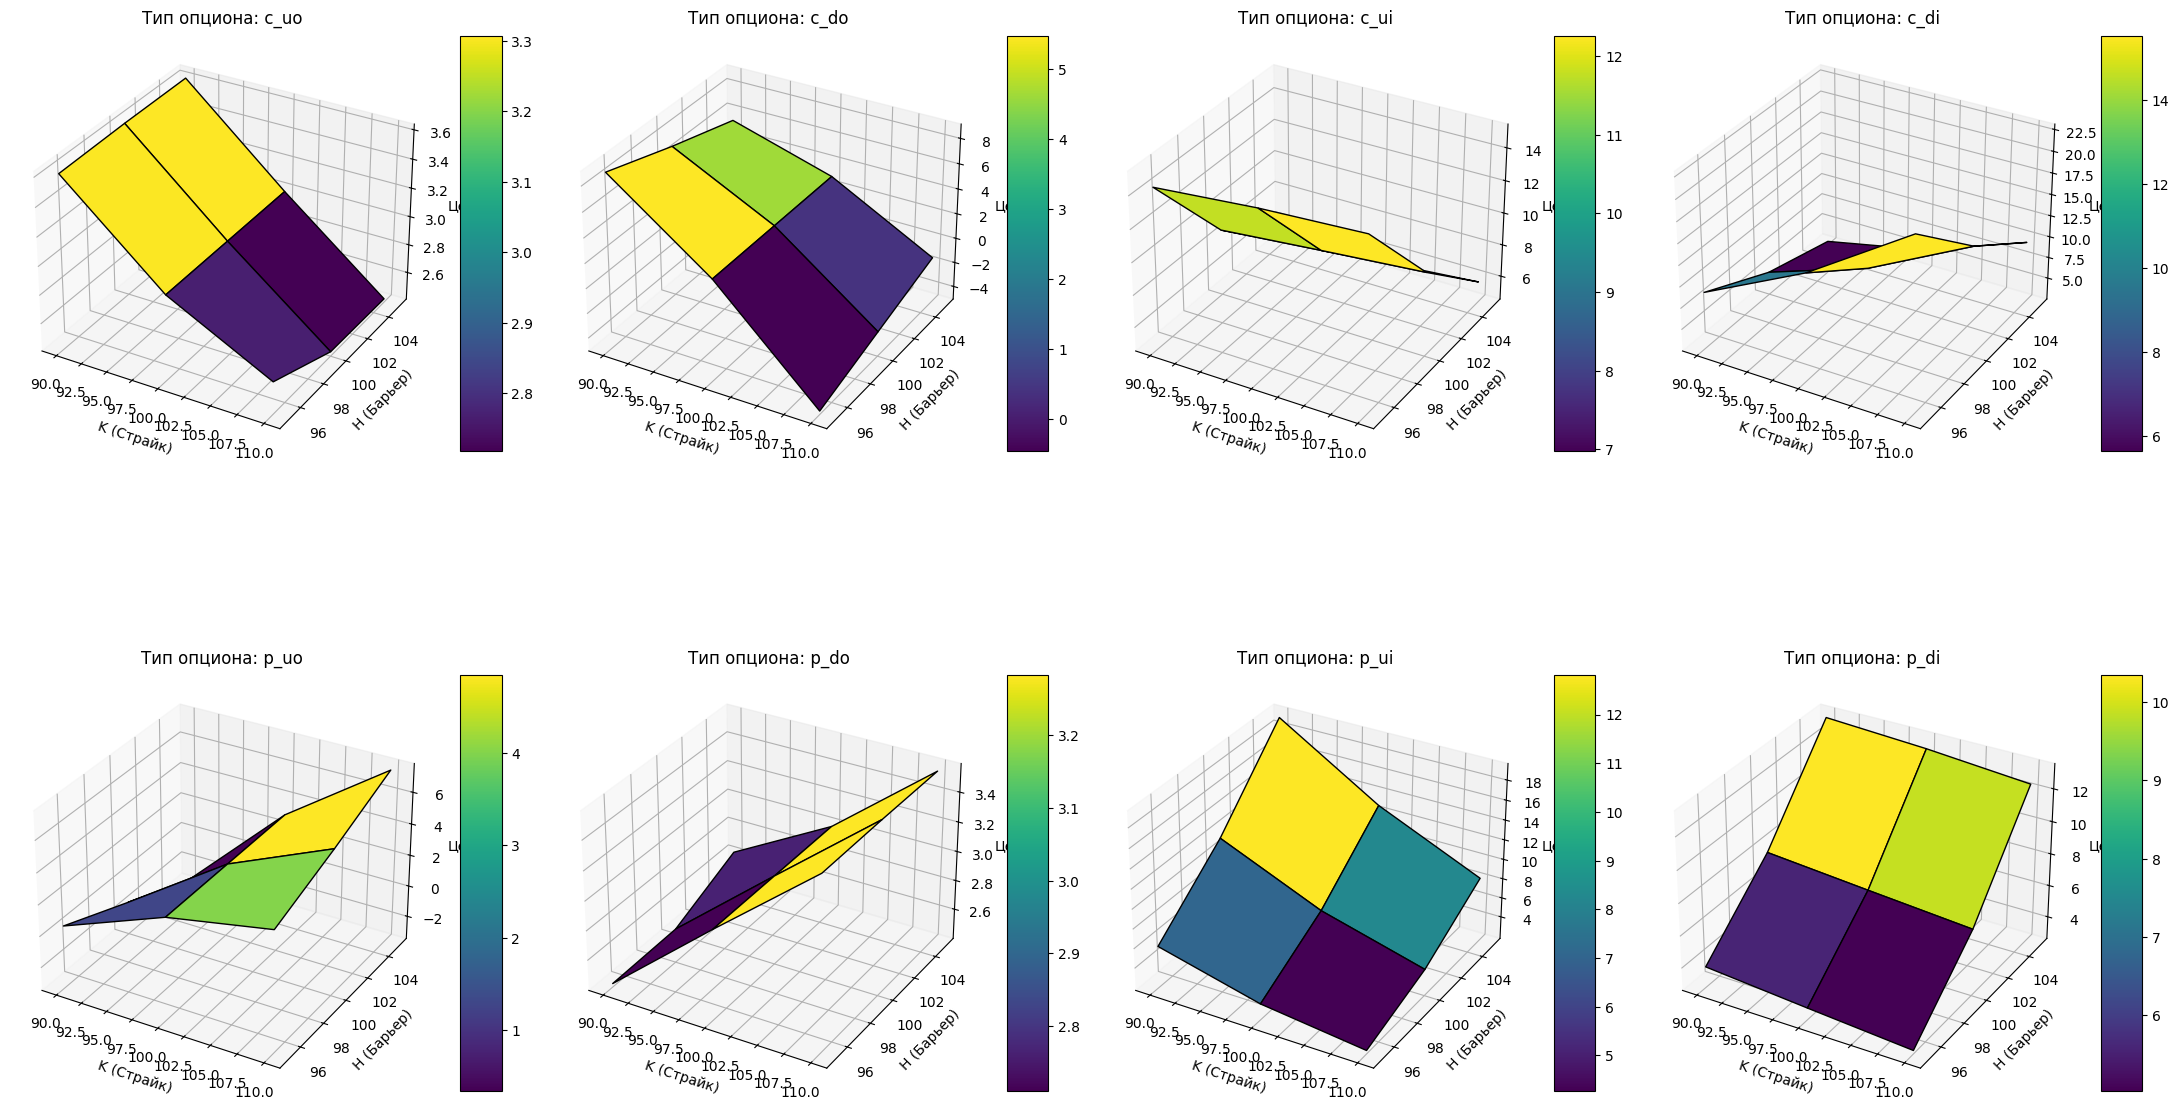

In [46]:
from mpl_toolkits.mplot3d import Axes3D

options = df.type.unique()

sigma = .3

fig = plt.figure(figsize=(22, 15))
# fig, axs = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 7))
K_grid, H_grid = np.meshgrid(Ks, Hs)


for idx, option in enumerate(options):

    sub_df = df[(df.type == option) & (df.sigma == sigma)]
    price_grid = df[(df.type == option) & (df.sigma == sigma)].price.values.reshape((3, 3))

    # surf = axs[idx // 4, idx % 4].plot_surface(K_grid, H_grid, price_grid, cmap="viridis", edgecolor="k")
    ax = fig.add_subplot(2, 4 , idx+1, projection="3d")
    surf = ax.plot_surface(K_grid, H_grid, price_grid, cmap="viridis", edgecolor="k")

    # Настройки графика
    ax.set_title(f"Тип опциона: {option}")
    ax.set_xlabel("K (Страйк)")
    ax.set_ylabel("H (Барьер)")
    ax.set_zlabel("Цена")

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

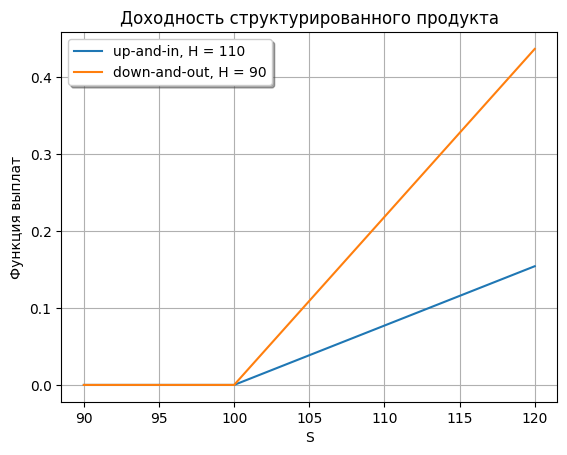

In [69]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

In [90]:
def d1(S, K, T, sigma, r, q=0):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, sigma, r, q=0):
    return d1(S, K, T, sigma, r, q) - sigma * np.sqrt(T)

def gap_option(S, K, T, sigma, r, is_call=True, q=0):
    d1_gap = d1(S, K, T, sigma, r, q)
    d2_gap = d2(S, K, T, sigma, r, q)
    if is_call:
        return S * np.exp(-q * T) * norm.cdf(d1_gap) - K * np.exp(-r * T) * norm.cdf(d2_gap)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2_gap) - S * np.exp(-q * T) * norm.cdf(-d1_gap)

def binary_option_call(S, K, T, sigma, r, q=0):
    d2_bin = d2(S, K, T, sigma, r, q)
    return np.exp(-r * T) * norm.cdf(d2_bin)

In [91]:
K_gap = 105 
K_binary = 100

plt.figure(figsize=(6, 4))

gap_call_payout = np.maximum(S_data - K_gap, 0)

binary_call_payout = np.where(S_data > K_binary, K_binary, 0)

gap_call_mean = np.mean(gap_call_payout)
binary_call_mean = np.mean(binary_call_payout)

gap_call_values = np.maximum(S_data - K_gap, 0)
# binary_call_values = np.where(S_data > K_binary, , 0)
binary_call_values = np.maximum(2* (S_data - K_gap), 0)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S_data, H_1, K_1, 0, T, r, 0, sigma, is_call)

plt.plot(S_data, call_1, label=f'barier {option_type}, H = {H_1}')

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S_data, H_2, K_2, 0, T, r, 0, sigma, is_call)

plt.plot(S_data, call_2, label=f'barier {option_type}, H = {H_2}')


plt.plot(S_data, gap_call_values, label='Гэп опцион', color='blue')

plt.plot(S_data, binary_call_values, label='Бинарный опцион (ЛБ2)', color='green')


plt.xlabel('Цена базового актива S_T')
plt.ylabel('Выплата')

plt.legend()
plt.tight_layout()
plt.show()


print(f"Средняя выплата гэп опциона (call): {gap_call_mean:.2f}")
print(f"Средняя выплата бинарного опциона (call): {binary_call_mean:.2f}")
print(f"Средняя выплата барьерного опциона (call Up-and-in): {np.mean(call_1)}")
print(f"Средняя выплата барьерного опциона (call Down-and-out): {np.mean(call_2)}")


TypeError: barrier_option() takes from 6 to 9 positional arguments but 10 were given

<Figure size 600x400 with 0 Axes>

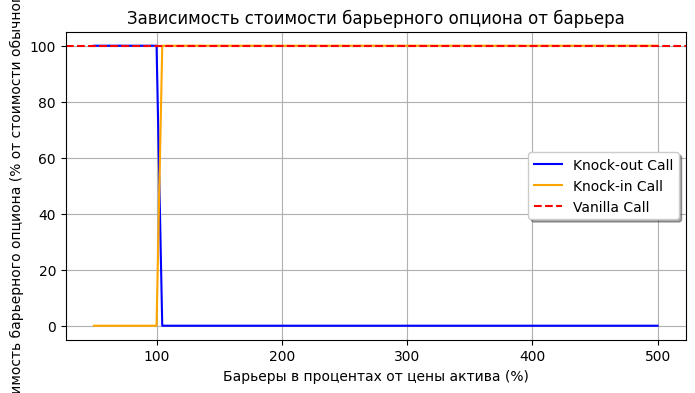

In [92]:
S0 = 100
K = 100
T = 1  
sigma = 0.2
r = 0.05  
barrier_ratios = np.linspace(0.5, 5, 100)

def vanilla_call(S, K, T, sigma, r, q=0):
    d1_val = d1(S, K, T, sigma, r, q)
    d2_val = d2(S, K, T, sigma, r, q)
    return S * np.exp(-q * T) * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)

def barrier_option_knock(S, K, H, T, sigma, r, is_call=True, is_knock_in=True, q=0):
    vanilla_price = vanilla_call(S, K, T, sigma, r, q) if is_call else vanilla_call(S, K, T, sigma, r, q)  # Пусть `put` аналогичен для простоты
    if is_knock_in:
        return vanilla_price if S < H else 0
    else:
        return vanilla_price if S >= H else 0


barrier_prices_knock_out = []
barrier_prices_knock_in = []
vanilla_price = vanilla_call(S0, K, T, sigma, r)

for ratio in barrier_ratios:
    H = S0 * ratio 
    knock_out_price = barrier_option_knock(S0, K, H, T, sigma, r, is_call=True, is_knock_in=False)
    knock_in_price = barrier_option_knock(S0, K, H, T, sigma, r, is_call=True, is_knock_in=True)
    barrier_prices_knock_out.append(knock_out_price / vanilla_price * 100)
    barrier_prices_knock_in.append(knock_in_price / vanilla_price * 100)


plt.figure(figsize=(8, 4))
plt.plot(barrier_ratios * 100, barrier_prices_knock_out, label='Knock-out Call', color='blue')
plt.plot(barrier_ratios * 100, barrier_prices_knock_in, label='Knock-in Call', color='orange')
plt.title('Зависимость стоимости барьерного опциона от барьера')
plt.xlabel('Барьеры в процентах от цены актива (%)')
plt.ylabel('Стоимость барьерного опциона (% от стоимости обычного call)')
plt.axhline(y=100, color='red', linestyle='--', label='Vanilla Call')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [93]:
def vanilla_put(S, K, T, sigma, r, q=0):
    d1_val = d1(S, K, T, sigma, r, q)
    d2_val = d2(S, K, T, sigma, r, q)
    return K * np.exp(-r * T) * norm.cdf(-d2_val) - S * np.exp(-q * T) * norm.cdf(-d1_val)

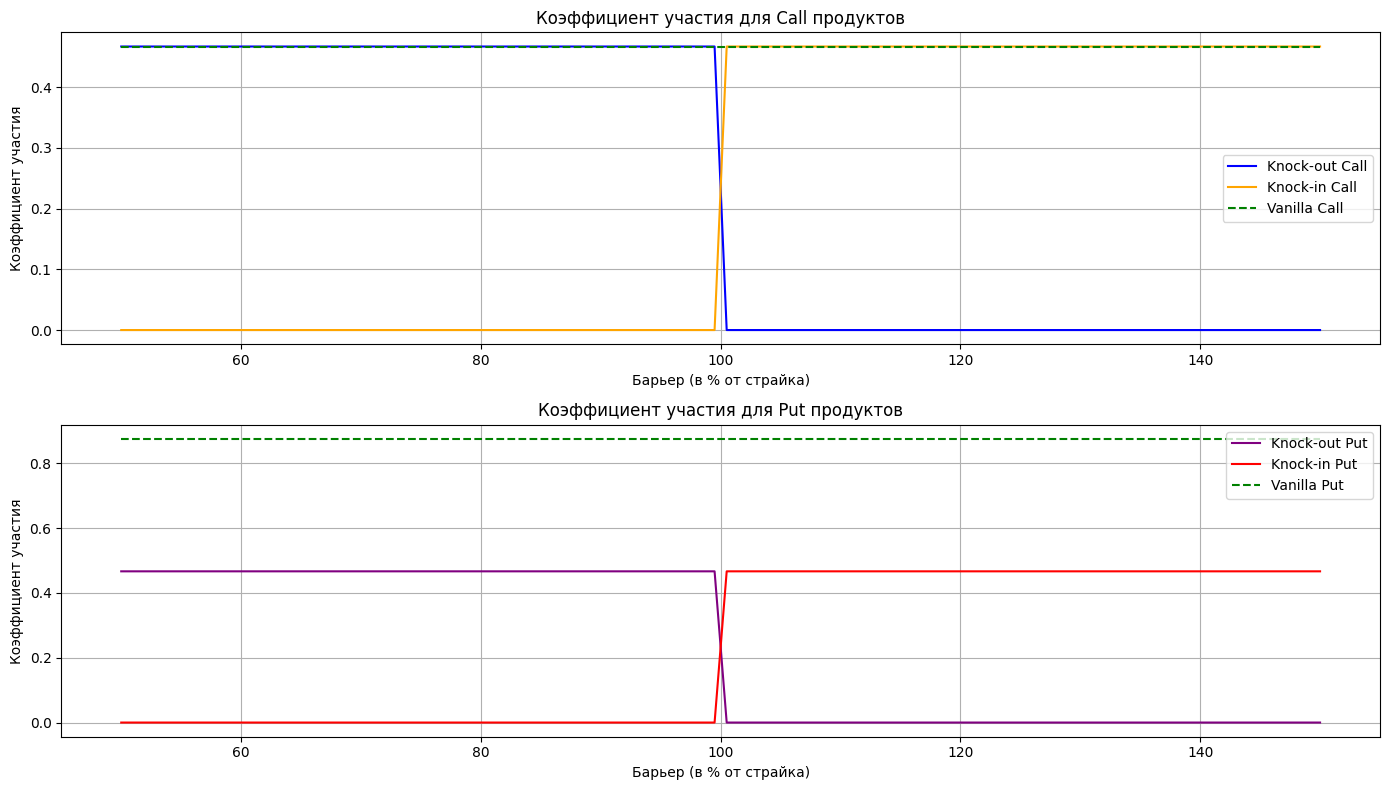

In [94]:
S0 = 100
K = 100
T = 1
sigma = 0.2
r = 0.05
N = 100
barrier_ratios = np.linspace(0.5, 1.5, 100)

DA = np.exp(-r * T) * N

def calculate_Q(S0, K, T, sigma, r, barrier_ratios, is_call, is_knock_in):
    Qs = []
    for ratio in barrier_ratios:
        H = K * ratio
        C = barrier_option(S0, K, H, T, sigma, r, is_call=is_call, is_knock_in=is_knock_in)
        Q = (N - DA) / C if C > 0 else 0
        Qs.append(Q)
    return Qs

Q_knock_out_call = calculate_Q(S0, K, T, sigma, r, barrier_ratios, is_call=True, is_knock_in=False)
Q_knock_in_call = calculate_Q(S0, K, T, sigma, r, barrier_ratios, is_call=True, is_knock_in=True)
Q_vanilla_call = [(N - DA) / vanilla_call(S0, K, T, sigma, r)] * len(barrier_ratios)

Q_knock_out_put = calculate_Q(S0, K, T, sigma, r, barrier_ratios, is_call=False, is_knock_in=False)
Q_knock_in_put = calculate_Q(S0, K, T, sigma, r, barrier_ratios, is_call=False, is_knock_in=True)
Q_vanilla_put = [(N - DA) / vanilla_put(S0, K, T, sigma, r)] * len(barrier_ratios)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(barrier_ratios * 100, Q_knock_out_call, label='Knock-out Call', color='blue')
plt.plot(barrier_ratios * 100, Q_knock_in_call, label='Knock-in Call', color='orange')
plt.plot(barrier_ratios * 100, Q_vanilla_call, label='Vanilla Call', color='green', linestyle='--')
plt.title('Коэффициент участия для Call продуктов')
plt.xlabel('Барьер (в % от страйка)')
plt.ylabel('Коэффициент участия')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(barrier_ratios * 100, Q_knock_out_put, label='Knock-out Put', color='purple')
plt.plot(barrier_ratios * 100, Q_knock_in_put, label='Knock-in Put', color='red')
plt.plot(barrier_ratios * 100, Q_vanilla_put, label='Vanilla Put', color='green', linestyle='--')
plt.title('Коэффициент участия для Put продуктов')
plt.xlabel('Барьер (в % от страйка)')
plt.ylabel('Коэффициент участия')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [95]:
# ваш код

# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [96]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [99]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
